## Getting the data


In [1]:
!kaggle competitions download -c playground-series-s4e10

import zipfile
import os

# Define the path to the zip file
zip_file_path = 'playground-series-s4e10.zip'

# Unzip the file to the current directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('.')

# Delete the zip file
os.remove(zip_file_path)


  0%|          | 0.00/1.45M [00:00<?, ?B/s]
 69%|██████▉   | 1.00M/1.45M [00:00<00:00, 1.41MB/s]
100%|██████████| 1.45M/1.45M [00:00<00:00, 1.88MB/s]


Reading all the data and putting it into df "dataset"

In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

dataset = pd.concat([train,test])

In [2]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [3]:
dublicates = train[train.duplicated()]
train.drop(dublicates.index, inplace=True)


## EDA

# Here’s a breakdown of what each column likely represents:

- id: This is likely a unique identifier for each loan application or borrower. It helps differentiate the records and is useful for indexing and tracking individual entries without revealing personal information.

- person_age: The age of the borrower. Age can be an important factor in determining the maturity and stability of the borrower, influencing their likelihood of repaying the loan.

- person_income: The annual income of the borrower. Higher incomes generally suggest a greater capacity to repay loans.

- person_home_ownership: Indicates the housing status of the borrower, such as owning a home, renting, or living with parents. This can impact the borrower's financial stability and their ability to repay the loan.

- person_emp_length: The number of years the borrower has been employed with their current employer. Longer employment length might indicate job stability, which is a positive signal in credit scoring.

- loan_intent: Describes the purpose of the loan. Common intents include education, medical expenses, and home improvement. Different intents may carry different levels of risk based on the reason for borrowing.

- loan_grade: A classification of the loan based on the risk associated with the borrower. Loans are typically graded from high credit quality (low risk) to low credit quality (high risk).

- loan_amnt: The amount of money borrowed. This figure is crucial for assessing the risk, as larger loans might be harder to repay depending on the borrower's financial situation.

- loan_int_rate: The interest rate on the loan. Higher interest rates may make loans more difficult to repay and are often associated with higher risk borrowers.

- loan_percent_income: This is the ratio of the loan amount to the borrower's annual income, expressed as a percentage. A high percentage can indicate that the loan constitutes a significant burden relative to the borrower's income.

- cb_person_default_on_file: Indicates whether the borrower has a history of defaulting on loans. "Y" might indicate a previous default, and "N" no defaults. This is a direct indicator of credit risk.

- cb_person_cred_hist_length: The length of the borrower's credit history in years. A longer credit history can provide more insight into the borrower's financial behavior and responsibility.

- loan_status: This is the target variable, usually indicating whether the loan was paid back or defaulted. It's what your model will attempt to predict based on the other features.

Checking for nan values 

In [5]:
dataset.isna().sum()


id                                0
person_age                        0
person_income                     0
person_home_ownership             0
person_emp_length                 0
loan_intent                       0
loan_grade                        0
loan_amnt                         0
loan_int_rate                     0
loan_percent_income               0
cb_person_default_on_file         0
cb_person_cred_hist_length        0
loan_status                   39098
dtype: int64

In [6]:
dataset.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [4]:
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical colums:")
print(numerical_columns)

print()

categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:")
print(categorical_columns)


Numerical colums:
['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']

Categorical columns:
['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [8]:
for cat_columns in categorical_columns:
    print(cat_columns, sorted(dataset[cat_columns].unique()))

person_home_ownership ['MORTGAGE', 'OTHER', 'OWN', 'RENT']
loan_intent ['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE']
loan_grade ['A', 'B', 'C', 'D', 'E', 'F', 'G']
cb_person_default_on_file ['N', 'Y']


# Plots


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Pie Chart Distribution - imbalanced dataset

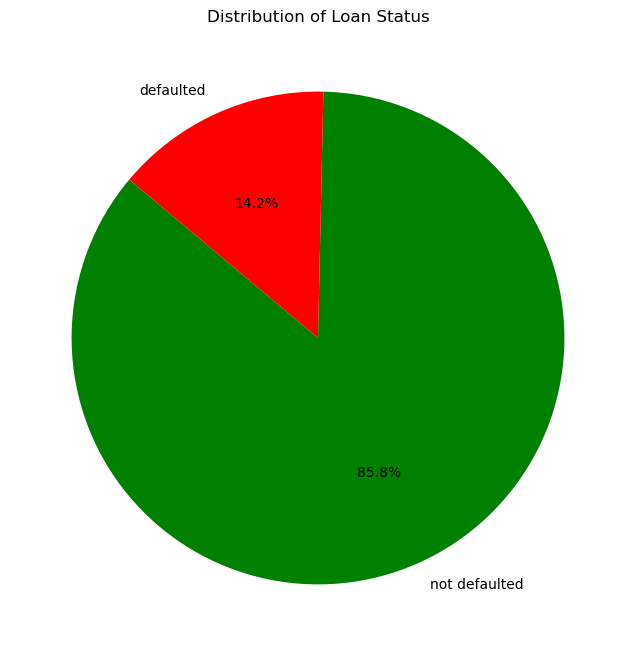

In [10]:
# Count the occurrences of each label
label_counts = dataset['loan_status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=["not defaulted", 'defaulted'],colors = ['green', 'red'], startangle=140, autopct='%1.1f%%')
plt.title('Distribution of Loan Status')
plt.show()

#### Histogram for both labels

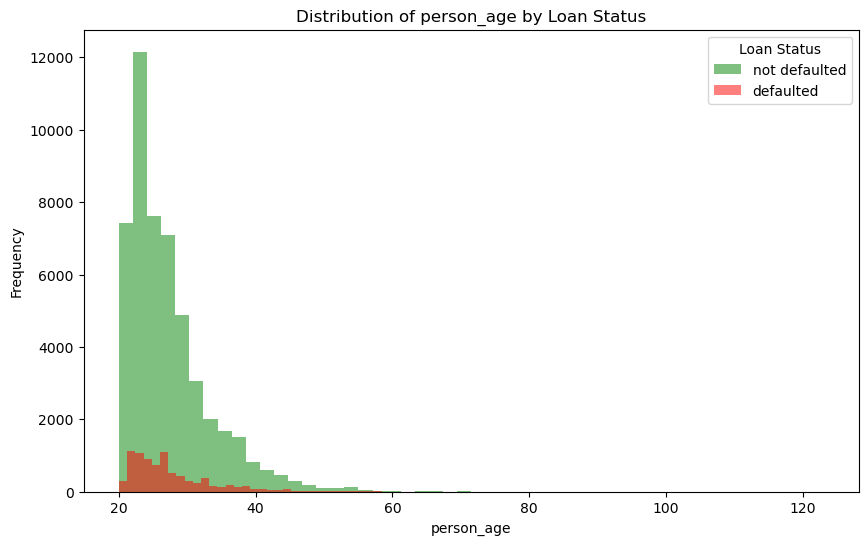

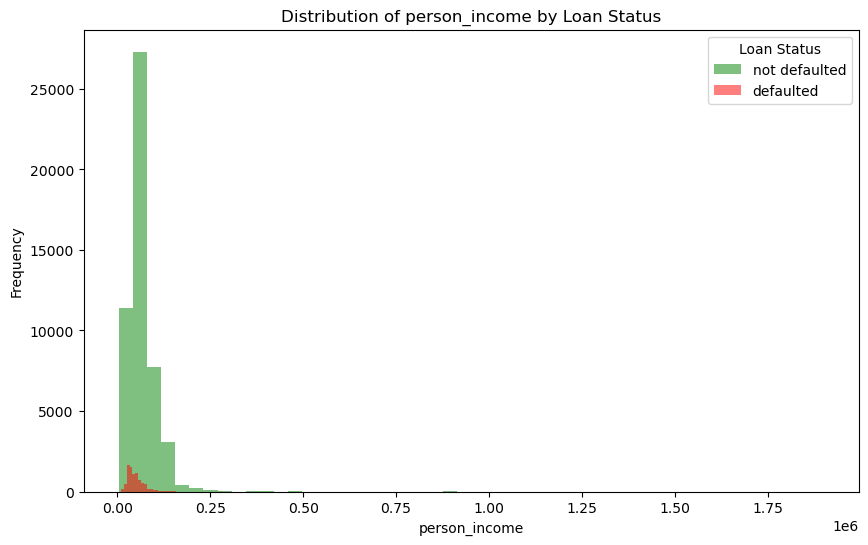

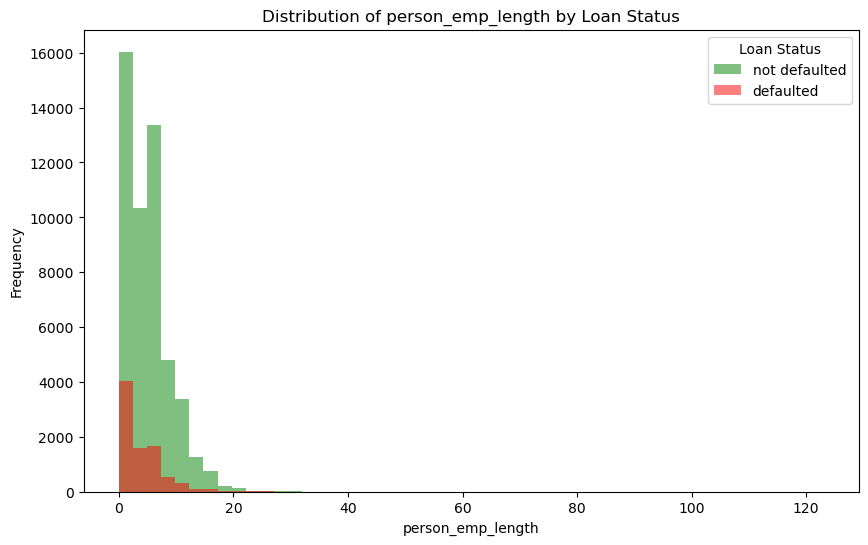

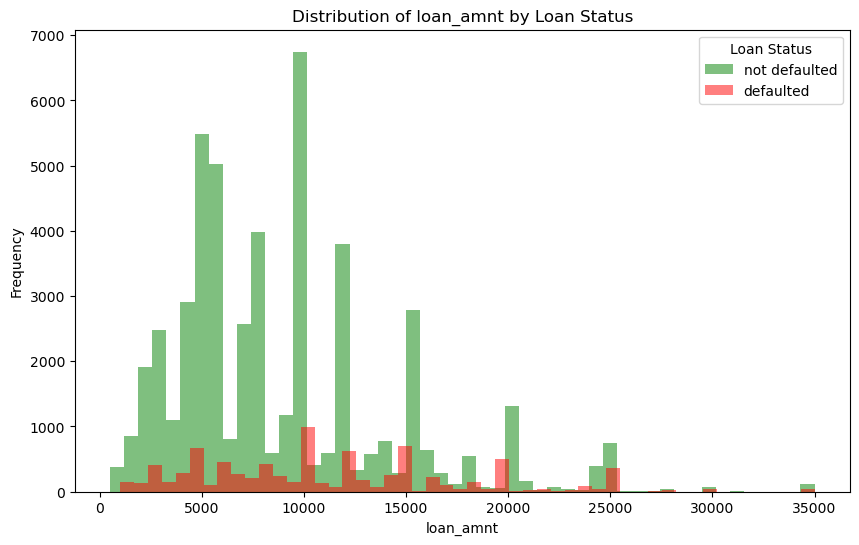

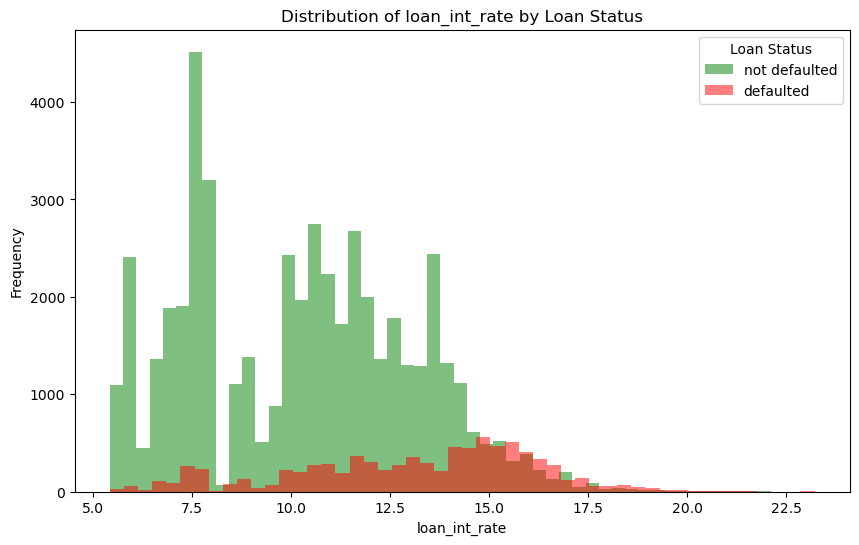

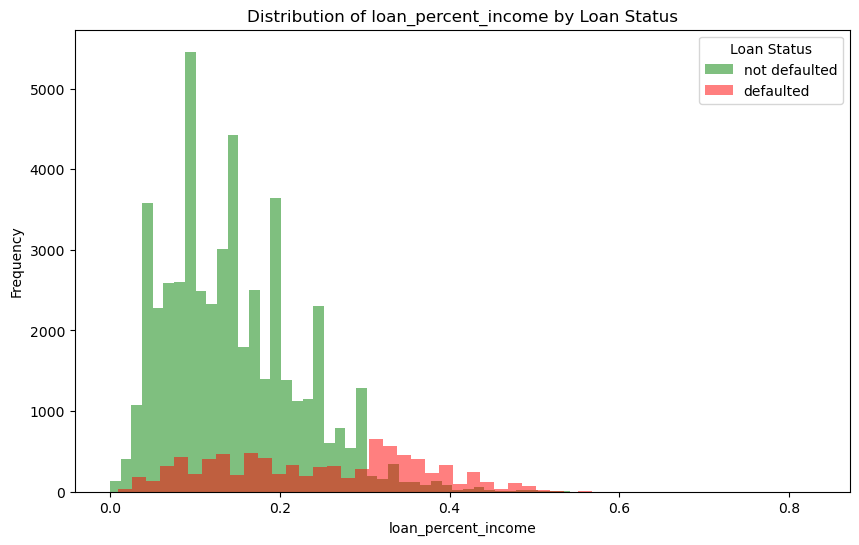

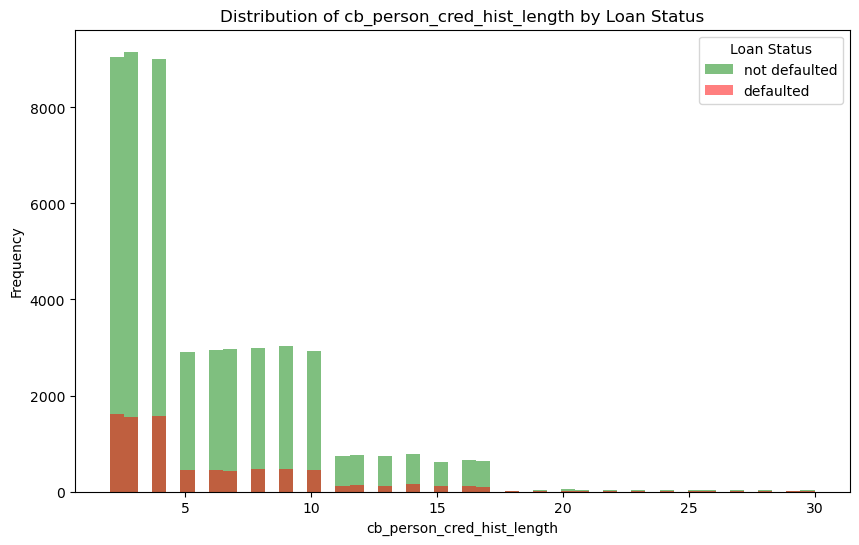

In [11]:
import matplotlib.pyplot as plt

# Define colors for each loan status
colors = ['green', 'red']

# Plot histograms for each numerical column
for column in numerical_columns:
    if column != 'loan_status':  # Skip the target variable
        if column in train.columns:  # Check if the column exists in the DataFrame
            plt.figure(figsize=(10, 6))
            for i, label in enumerate(train['loan_status'].unique()):
                plt.hist(train[train['loan_status'] == label][column], color=colors[i], bins=50, alpha=0.5, label=["not defaulted", "defaulted"][i])
            
            # Add title and labels
            plt.title(f'Distribution of {column} by Loan Status')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            
            # Add legend
            plt.legend(title='Loan Status')
            
            # Display the plot
            plt.show()

#### Fractions for Categorical Columns

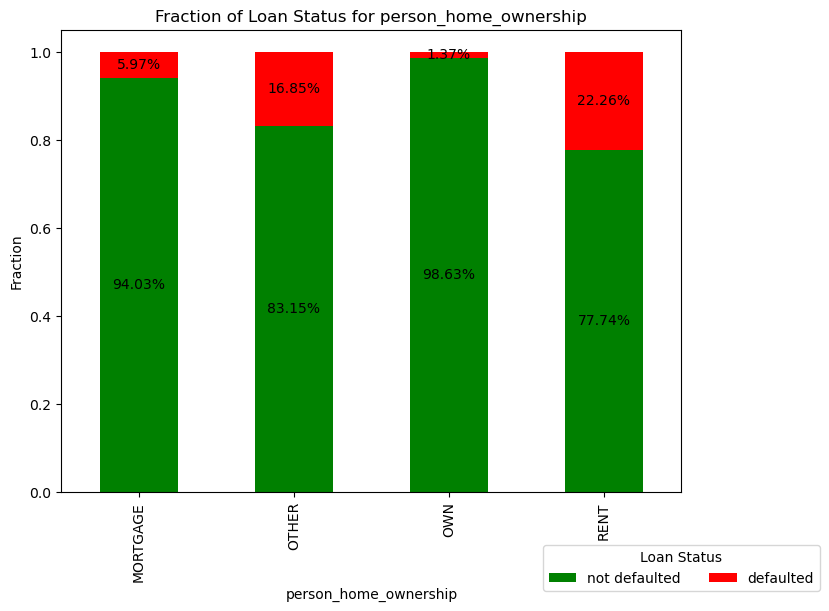

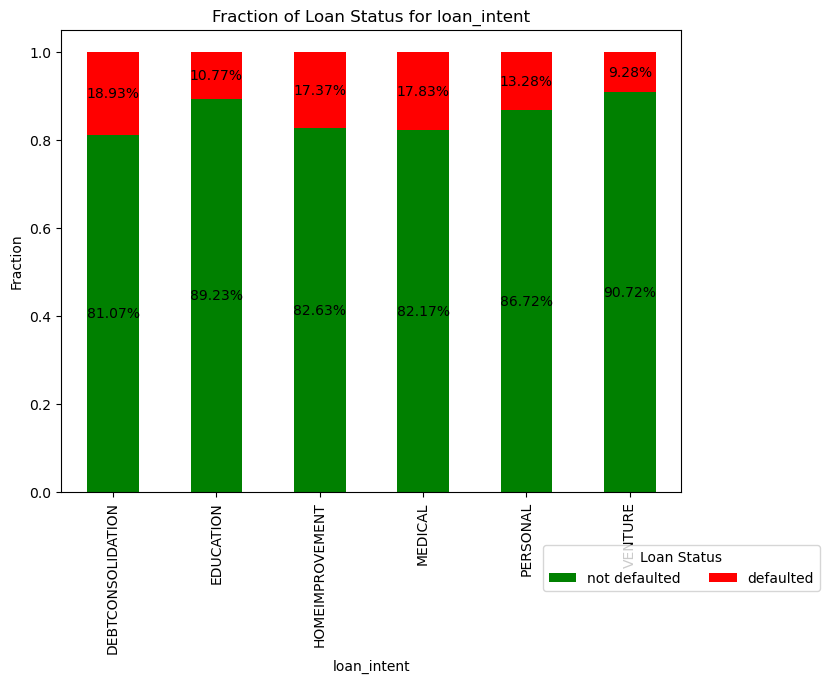

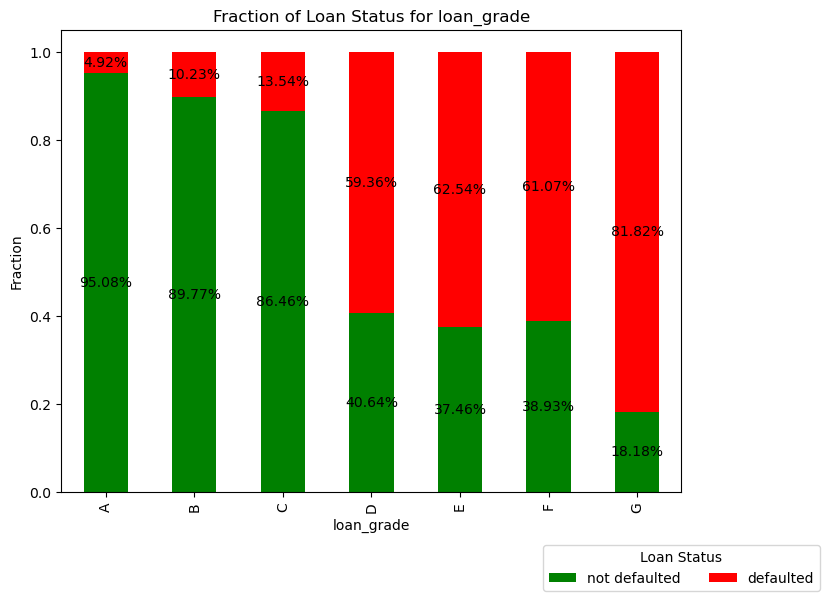

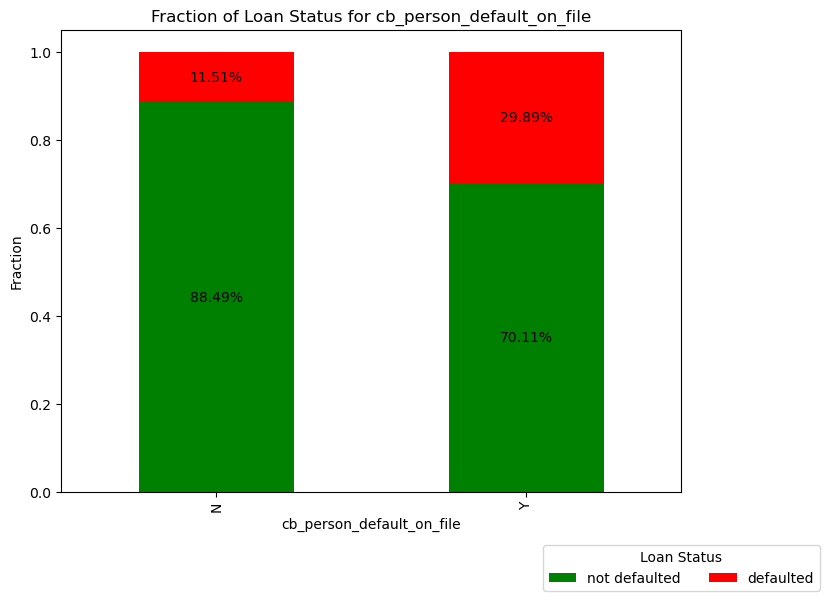

In [12]:
for columns in categorical_columns:
    plt.figure(figsize=(8, 6))
    counts = dataset.groupby([columns, 'loan_status']).size().unstack(fill_value=0)
    fraction = counts.div(counts.sum(axis=1), axis=0)
    ax = fraction.plot(kind='bar', stacked=True, ax=plt.gca(), color=['green', 'red'])
    
    # Adding annotations
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x()
        y = p.get_y()
        ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')
    
    plt.title(f'Fraction of Loan Status for {columns}')
    plt.ylabel('Fraction')
    plt.xlabel(columns)
    plt.legend(title='Loan Status', labels=['not defaulted', 'defaulted'], loc='upper center', bbox_to_anchor=(1, -0.1), ncol=2)
    plt.show()

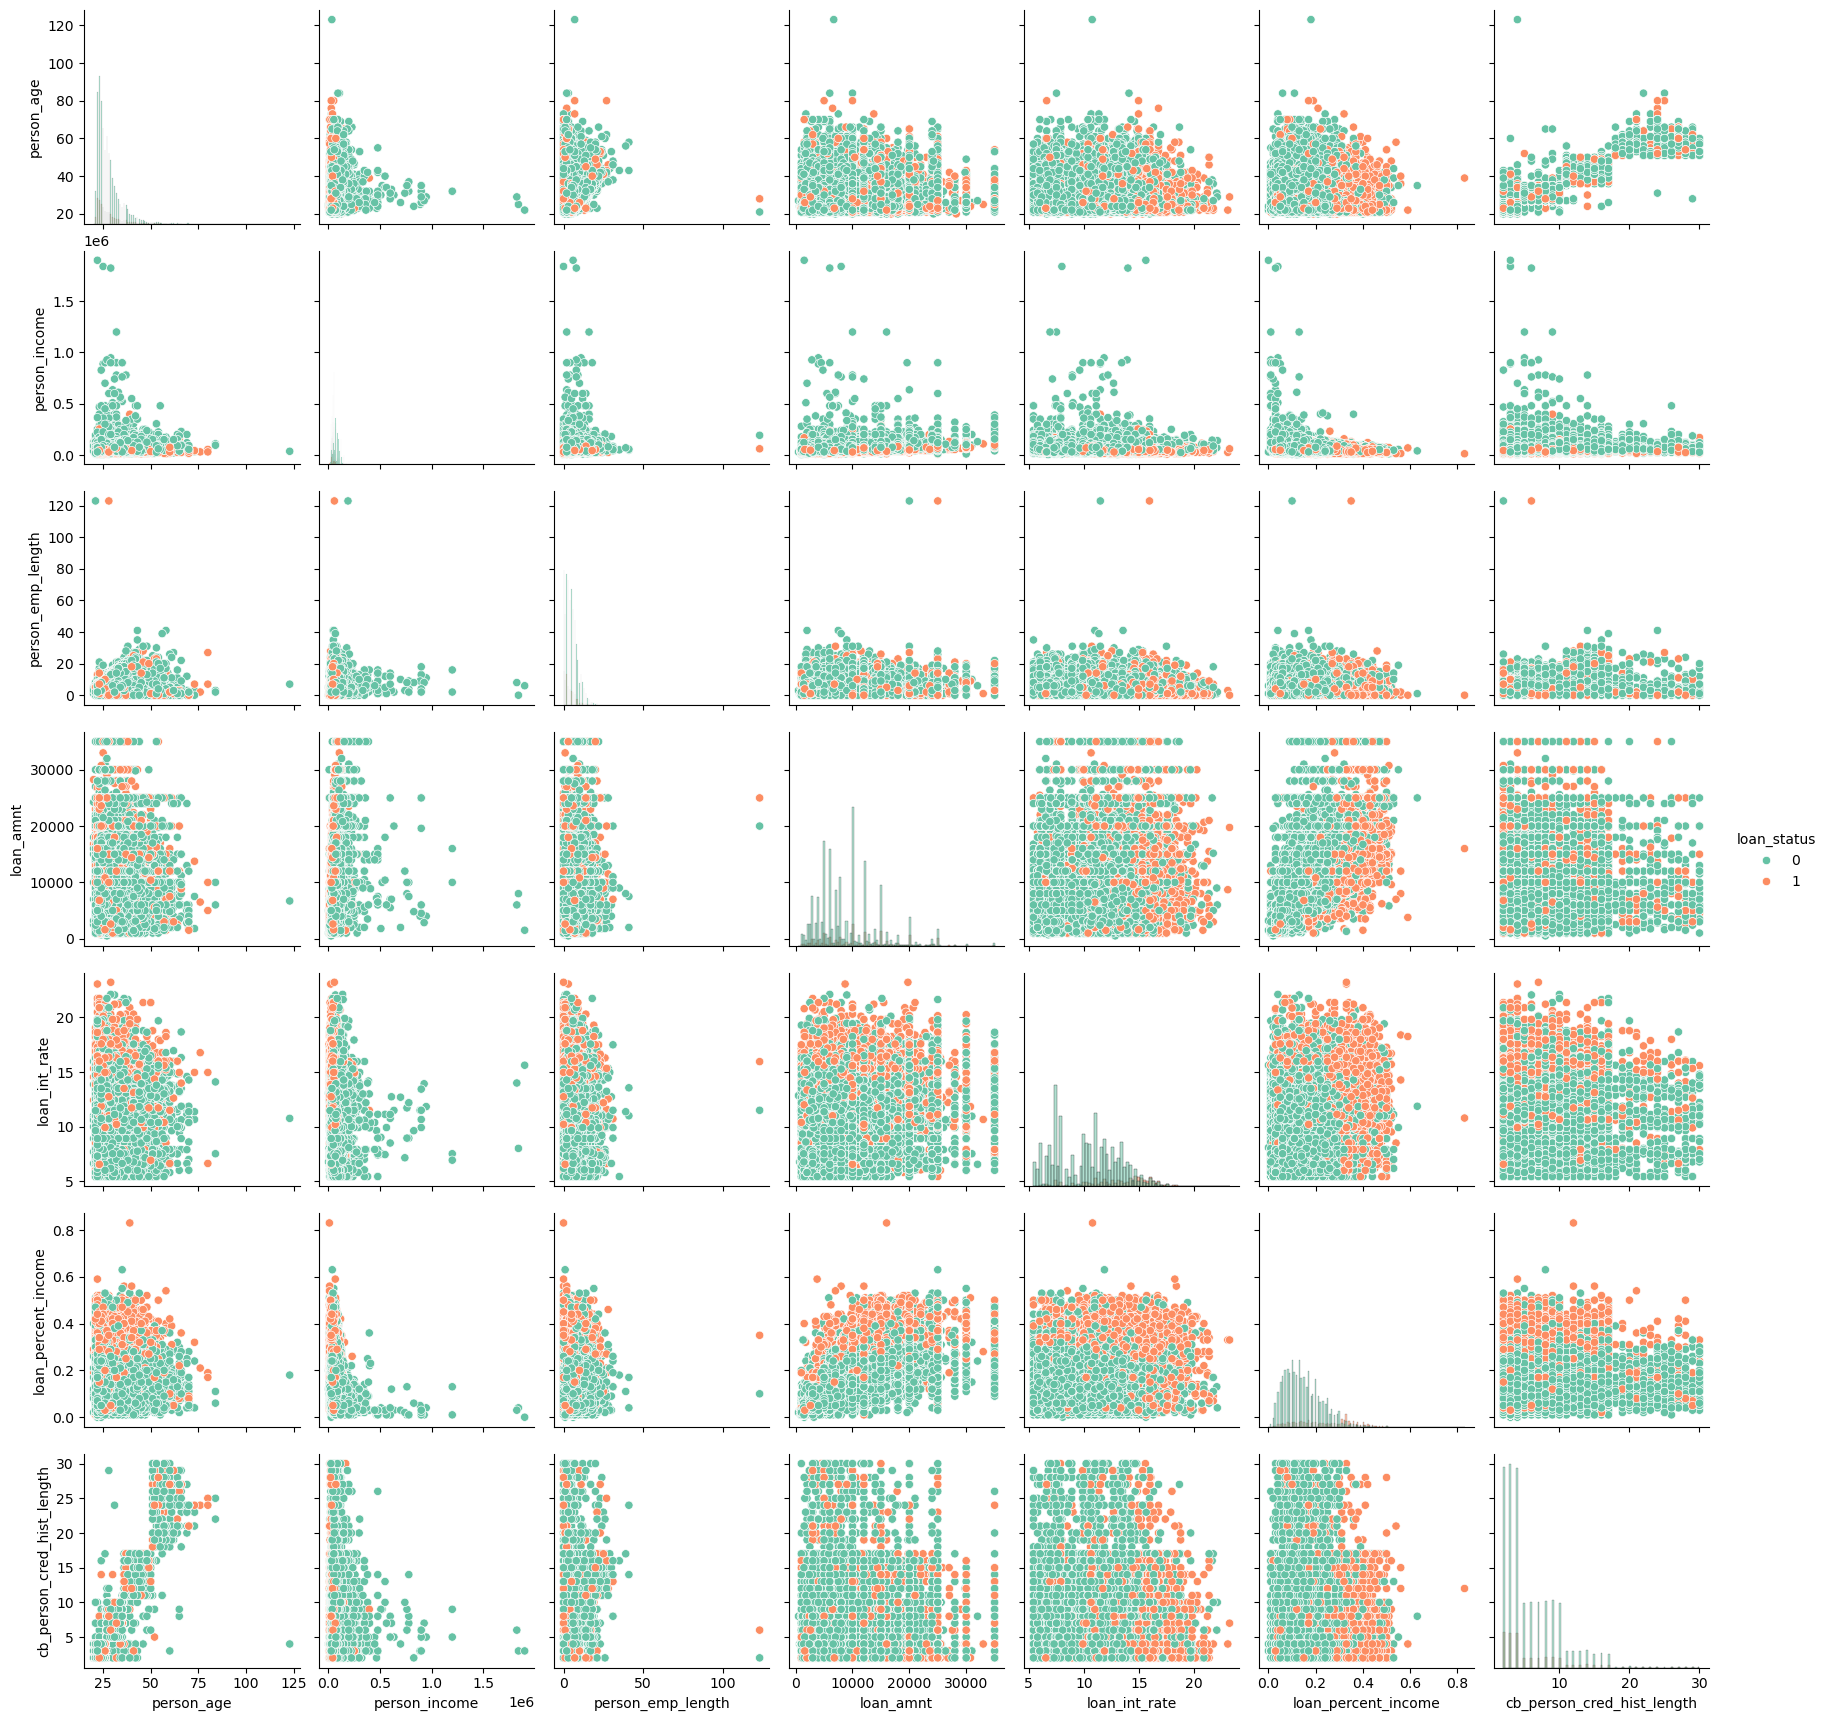

In [6]:
sns.pairplot(train, hue='loan_status', diag_kind='hist', palette='Set2')

In [14]:
# query if there is isntances of person_age < person_emp_length
train.query('person_age < person_emp_length')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
41079,28,60350,MORTGAGE,123.0,MEDICAL,D,25000,15.95,0.35,Y,6,1
49252,21,192000,MORTGAGE,123.0,VENTURE,B,20000,11.49,0.10,N,2,0


In [15]:
test.query('person_age < person_emp_length')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [16]:
train.drop(train.query('person_age < person_emp_length').index, inplace=True)

In [17]:
train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [18]:
test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
39093,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [19]:
train['loan_intent'].value_counts()

loan_intent
EDUCATION            12271
MEDICAL              10933
PERSONAL             10016
VENTURE              10010
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

## Preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df_train, df_test):  
    label_enc = LabelEncoder()   
    label_cols = ['person_home_ownership', 'loan_grade', 'cb_person_default_on_file']    
    for col in label_cols:
        df_train[col] = label_enc.fit_transform(df_train[col])
        df_test[col] = label_enc.transform(df_test[col])    
    df_train = pd.get_dummies(df_train, columns=['loan_intent'], drop_first=True)
    df_test = pd.get_dummies(df_test, columns=['loan_intent'], drop_first=True)
    
    return df_train, df_test

train_processed, test_processed = preprocess_data(train, test)

In [21]:
train_processed

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,37,35000,3,0.0,1,6000,11.49,0.17,0,14,0,True,False,False,False,False
1,22,56000,2,6.0,2,4000,13.35,0.07,0,2,0,False,False,True,False,False
2,29,28800,2,8.0,0,6000,8.90,0.21,0,10,0,False,False,False,True,False
3,30,70000,3,14.0,1,12000,11.11,0.17,0,5,0,False,False,False,False,True
4,22,60000,3,2.0,0,6000,6.92,0.10,0,3,0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,0,5.0,3,25000,15.95,0.21,1,10,0,True,False,False,False,False
58641,28,28800,3,0.0,2,10000,12.73,0.35,0,8,1,False,False,True,False,False
58642,23,44000,3,7.0,3,6800,16.00,0.15,0,2,1,True,False,False,False,False
58643,22,30000,3,2.0,0,5000,8.90,0.17,0,3,0,True,False,False,False,False


In [22]:
test_processed

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,23,69000,3,3.0,5,25000,15.76,0.36,0,2,False,True,False,False,False
1,26,96000,0,6.0,2,10000,12.68,0.10,1,4,False,False,False,True,False
2,26,30000,3,5.0,4,4000,17.19,0.13,1,2,False,False,False,False,True
3,33,50000,3,4.0,0,7000,8.90,0.14,0,7,False,False,False,False,False
4,26,102000,0,8.0,3,15000,16.32,0.15,1,4,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,22,31200,0,2.0,1,3000,10.37,0.10,0,4,False,False,False,False,False
39094,22,48000,0,6.0,0,7000,6.03,0.15,0,3,True,False,False,False,False
39095,51,60000,0,0.0,0,15000,7.51,0.25,0,25,False,False,False,True,False
39096,22,36000,0,4.0,3,14000,15.62,0.39,1,4,False,False,False,True,False


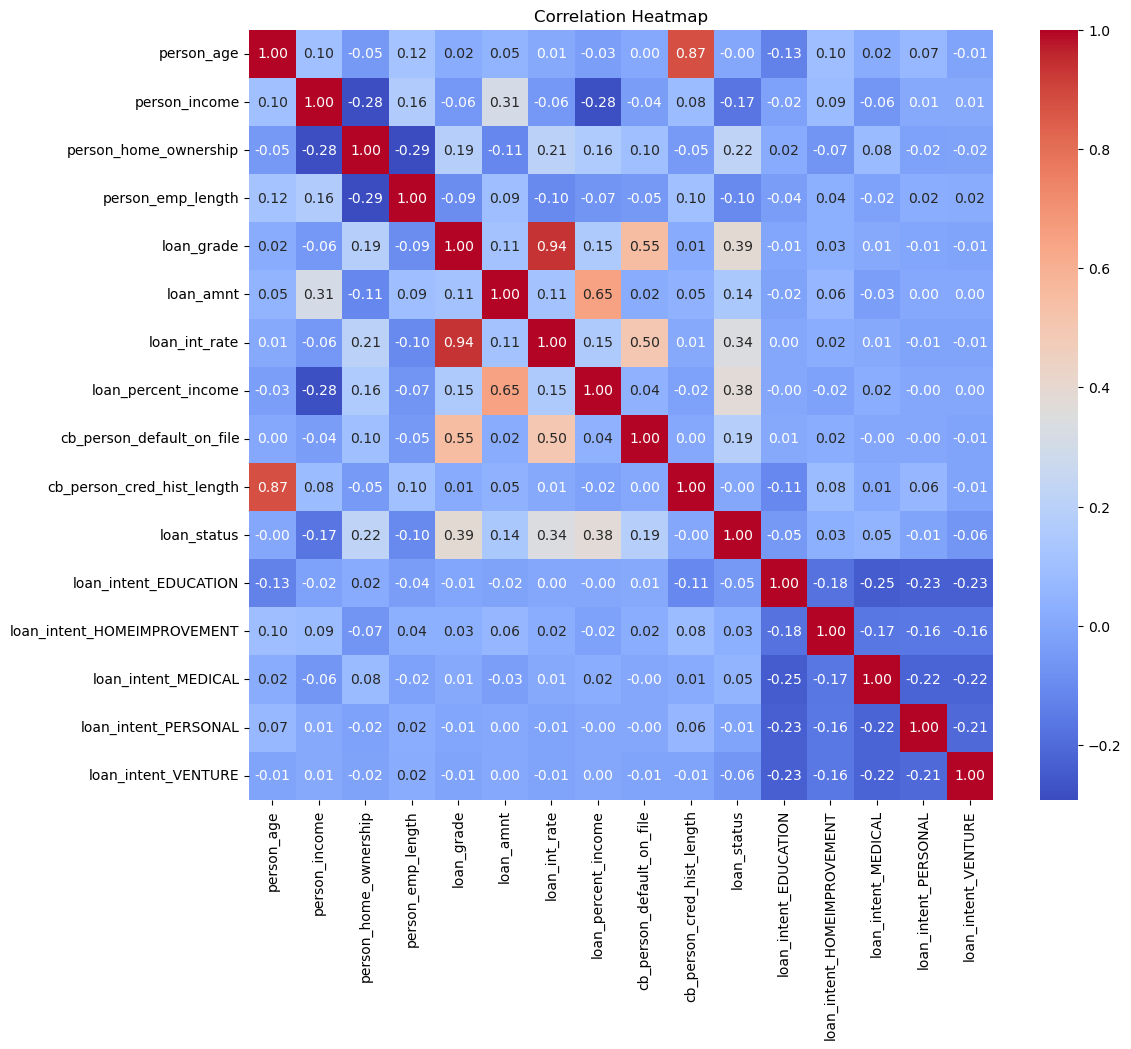

In [8]:
correlation = train_processed.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')

plt.show()

In [24]:
print(train_processed.columns)
print(test_processed.columns)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')
Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')


## Feature Engineering

In [25]:
import numpy as np
def feature_engineering(df):
    df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']
    df['financial_burden'] = df['loan_amnt'] * df['loan_int_rate']
    df['income_per_year_emp'] = df['person_income'] / df['person_emp_length'].replace(0, np.nan)
    df['int_to_loan_ratio'] = df['loan_int_rate'] / df['loan_amnt'].replace(0, np.nan)
    df['loan_int_emp_interaction'] = df['loan_int_rate'] * df['person_emp_length']
    df['debt_to_credit_ratio'] = df['loan_amnt'] / df['cb_person_cred_hist_length'].replace(0, np.nan)
    df['int_to_cred_hist'] = df['loan_int_rate'] / df['cb_person_cred_hist_length'].replace(0, np.nan)
    df['int_per_year_emp'] = df['loan_int_rate'] / df['person_emp_length'].replace(0, np.nan)
    df['loan_amt_per_emp_year'] = df['loan_amnt'] / df['person_emp_length'].replace(0, np.nan)
    df['income_to_loan_ratio'] = df['person_income'] / df['loan_amnt'].replace(0, np.nan)

    df['income_bin'] = pd.qcut(df['person_income'], 5, labels=False)
    df['rate_bin'] = pd.qcut(df['loan_int_rate'], 5, labels=False)
    df['person_emp_length'] = df['person_emp_length'].astype(int)
    df['loan_grade'] = df['loan_grade'].replace({'F': 'E', 'G': 'E'})

    df['loan_to_income'] = np.round(df['loan_amnt'] / df['person_income'], 2)
    df['total_amount_payable'] = np.floor(df['loan_amnt'] * (1 + df['loan_int_rate'] / 100))
    df['interest'] = np.floor(df['loan_amnt'] * df['loan_int_rate'] / 100)
    df['amt_payable_to_income'] = np.round(df['total_amount_payable'] / df['person_income'], 2)

    df['loan_percent_error'] = np.round(df['loan_to_income'] - df['loan_percent_income'], 2)
    df['income_2'] = np.floor(df['loan_amnt'] / df['loan_percent_income'])
    df['amt_payable_to_income_2'] = np.round(df['total_amount_payable'] / df['income_2'], 2)

    df['credit_hist_vs_age'] = np.round(df['cb_person_cred_hist_length'] / df['person_age'], 2)
    df['credit_hist_vs_work'] = np.round(df['person_emp_length'] / df['cb_person_cred_hist_length'], 2)
    df['income_vs_age'] = np.round(df['person_income'] / df['person_age'], 2)
    df['work_vs_age'] = np.round(df['person_emp_length'] / df['person_age'], 2)

    df['risk_flag'] = np.where(
        (df['cb_person_default_on_file'] == 'Y') & (df['loan_grade'].isin(['D', 'E'])),
        1,
        0
    )
    df['ratio1'] = np.round(
        (df['total_amount_payable'] / df['person_income']) * (df['person_emp_length'] / df['person_age']),
        2
    )
    df['ratio2'] = np.floor(
        (df['person_emp_length'] / df['person_age']) * df['person_income']
    )

    df['grade_home_interaction'] = (
        df['person_home_ownership'].astype(str) + '_' + df['loan_grade'].astype(str)
    )

    return df

train_processed = feature_engineering(train_processed)
test_processed = feature_engineering(test_processed)

train_processed.replace([np.inf, -np.inf], np.nan, inplace=True)
test_processed.replace([np.inf, -np.inf], np.nan, inplace=True)

In [26]:
train_processed.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,loan_percent_error,income_2,amt_payable_to_income_2,credit_hist_vs_age,credit_hist_vs_work,income_vs_age,work_vs_age,risk_flag,ratio1,ratio2
count,58643.000000,5.864300e+04,58643.000000,58643.000000,58643.000000,58643.000000,58643.000000,58643.000000,58643.000000,58643.000000,...,58643.000000,5.864100e+04,58643.000000,58643.000000,58643.000000,58643.000000,58643.000000,58643.0,58643.000000,58643.000000
mean,27.550961,6.404405e+04,1.673635,4.696980,1.066606,9217.103525,10.677771,0.159235,0.148372,5.813618,...,0.000470,6.424720e+04,0.176655,0.196525,1.126482,2382.198357,0.172887,0.0,0.029775,11824.430623
std,6.033258,3.792807e+04,1.452526,3.899118,1.046169,5563.342345,3.034669,0.091690,0.355472,4.029234,...,0.023049,3.663539e+04,0.102814,0.094490,1.062091,1395.219228,0.134057,0.0,0.031372,13607.565814
min,20.000000,4.200000e+03,0.000000,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,...,-0.540000,3.750000e+03,0.000000,0.030000,0.000000,168.000000,0.000000,0.0,0.000000,0.000000
25%,23.000000,4.200000e+04,0.000000,2.000000,0.000000,5000.000000,7.880000,0.090000,0.000000,3.000000,...,0.000000,4.166600e+04,0.100000,0.120000,0.290000,1555.560000,0.060000,0.0,0.010000,3000.000000
50%,26.000000,5.800000e+04,3.000000,4.000000,1.000000,8000.000000,10.750000,0.140000,0.000000,4.000000,...,0.000000,5.833300e+04,0.160000,0.170000,0.800000,2142.860000,0.140000,0.0,0.020000,8181.000000
75%,30.000000,7.560000e+04,3.000000,7.000000,2.000000,12000.000000,12.990000,0.210000,0.000000,8.000000,...,0.000000,7.692300e+04,0.230000,0.270000,1.670000,2909.090000,0.270000,0.0,0.040000,16666.000000
max,123.000000,1.900000e+06,3.000000,41.000000,6.000000,35000.000000,23.220000,0.830000,1.000000,30.000000,...,2.810000,1.300000e+06,0.920000,1.040000,13.000000,86363.640000,0.950000,0.0,0.760000,600000.000000


In [27]:
test_processed.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,loan_percent_error,income_2,amt_payable_to_income_2,credit_hist_vs_age,credit_hist_vs_work,income_vs_age,work_vs_age,risk_flag,ratio1,ratio2
count,39098.000000,3.909800e+04,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000,...,39098.000000,3.909400e+04,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000,39098.0,39098.000000,39098.000000
mean,27.566781,6.406046e+04,1.663282,4.687068,1.061742,9251.466188,10.661216,0.159573,0.150161,5.830707,...,0.000612,6.421898e+04,0.177042,0.196849,1.125682,2382.351786,0.172588,0.0,0.029870,11849.230523
std,6.032761,3.795583e+04,1.454022,3.868395,1.039602,5576.254680,3.020220,0.091633,0.357234,4.072157,...,0.028260,3.704801e+04,0.102783,0.095262,1.061209,1377.474256,0.133763,0.0,0.032698,13856.790431
min,20.000000,4.000000e+03,0.000000,0.000000,0.000000,700.000000,5.420000,0.000000,0.000000,2.000000,...,-0.470000,5.660000e+03,0.000000,0.040000,0.000000,100.000000,0.000000,0.0,0.000000,0.000000
25%,23.000000,4.200000e+04,0.000000,2.000000,0.000000,5000.000000,7.880000,0.090000,0.000000,3.000000,...,0.000000,4.173900e+04,0.100000,0.120000,0.290000,1551.720000,0.060000,0.0,0.010000,3010.250000
50%,26.000000,5.800000e+04,3.000000,4.000000,1.000000,8000.000000,10.750000,0.140000,0.000000,4.000000,...,0.000000,5.833300e+04,0.160000,0.170000,0.800000,2142.860000,0.140000,0.0,0.020000,8181.000000
75%,30.000000,7.588500e+04,3.000000,7.000000,2.000000,12000.000000,12.990000,0.210000,0.000000,8.000000,...,0.000000,7.692300e+04,0.230000,0.270000,1.670000,2903.230000,0.270000,0.0,0.040000,16666.000000
max,94.000000,1.900000e+06,3.000000,42.000000,6.000000,35000.000000,22.110000,0.730000,1.000000,30.000000,...,2.810000,1.200000e+06,0.840000,0.670000,14.000000,70370.370000,0.940000,0.0,1.750000,702000.000000


In [28]:
# all object columns tranformed to categorical columns
for column in train_processed.select_dtypes(include=['object']).columns:
    train_processed[column] = train_processed[column].astype('category')
for column in test_processed.select_dtypes(include=['object']).columns:
    test_processed[column] = test_processed[column].astype('category')

## Modeling

In [30]:
from sklearn.model_selection import train_test_split    

X = train_processed.drop('loan_status', axis=1)
y = train_processed['loan_status']


## Backward Feature Elimination

In [31]:
from lightgbm import LGBMClassifier 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:

lgbm = LGBMClassifier(n_estimators=1000, random_state=42, n_jobs=-1)

lgbm.fit(X_train, y_train)

print('Validation roc_auc:', roc_auc_score(y_val, lgbm.predict_proba(X_val)[:, 1]))

[LightGBM] [Info] Number of positive: 6725, number of negative: 40189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5229
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143347 -> initscore=-1.787761
[LightGBM] [Info] Start training from score -1.787761
Training roc_auc: 0.9999973471074082
Validation roc_auc: 0.954335024118675


In [34]:
from sklearn.model_selection import StratifiedKFold

cv_strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

bfs = SFS(
    estimator=lgbm,
    k_features=(10, 35),
    forward=False,
    floating=True,
    scoring='roc_auc',
    cv=cv_strat,
    n_jobs=-1,
    verbose=2
)

bfs = bfs.fit(X_train, y_train)

selected_features = list(bfs.k_feature_names_)

print(selected_features)


c:\Users\Stefan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5380, number of negative: 32151
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5202
[LightGBM] [Info] Number of data points in the train set: 37531, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143348 -> initscore=-1.787755
[LightGBM] [Info] Start training from score -1.787755
[LightGBM] [Info] Number of positive: 5380, number of negative: 32151
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5206
[LightGBM] [Info] Number of data points in the train set: 37531, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143348 -> initscore=-1.787755
[LightGBM] [Info] Start training from score -1.787755
[LightGBM] [In

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  8.0min finished

[2024-10-31 11:58:17] Features: 41/10 -- score: 0.9491799388388718[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  39 out of  41 | elapsed:  7.5min remaining:   22.9s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:  7.5min finished

[2024-10-31 12:05:47] Features: 40/10 -- score: 0.9491799388388718[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:  7.4min remaining:   23.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent worker

['person_age', 'person_income', 'loan_grade', 'loan_int_rate', 'loan_percent_income', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_to_income_ratio', 'loan_int_emp_interaction', 'loan_amt_per_emp_year', 'income_bin', 'total_amount_payable', 'interest', 'loan_percent_error', 'income_2', 'credit_hist_vs_age', 'ratio1', 'ratio2', 'grade_home_interaction']


[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:  2.5min finished

[2024-10-31 16:28:59] Features: 10/10 -- score: 0.9478121358086289

In [37]:
print(len(selected_features))

22


In [38]:

X_train = X_train[selected_features]

X_val = X_val[selected_features]

lgbm = LGBMClassifier(n_estimators=1000, random_state=42, n_jobs=-1)

lgbm.fit(X_train, y_train)

y_pred_proba = lgbm.predict_proba(X_val)[:, 1]

roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f'Validation ROC AUC: {roc_auc:.4f}')

[LightGBM] [Info] Number of positive: 6725, number of negative: 40189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2525
[LightGBM] [Info] Number of data points in the train set: 46914, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143347 -> initscore=-1.787761
[LightGBM] [Info] Start training from score -1.787761
Validation ROC AUC: 0.9541


In [39]:
import optuna
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


<frozen importlib._bootstrap>:488: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [40]:
X.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_to_income_ratio',
       'financial_burden', 'income_per_year_emp', 'int_to_loan_ratio',
       'loan_int_emp_interaction', 'debt_to_credit_ratio', 'int_to_cred_hist',
       'int_per_year_emp', 'loan_amt_per_emp_year', 'income_to_loan_ratio',
       'income_bin', 'rate_bin', 'loan_to_income', 'total_amount_payable',
       'interest', 'amt_payable_to_income', 'loan_percent_error', 'income_2',
       'amt_payable_to_income_2', 'credit_hist_vs_age', 'credit_hist_vs_work',
       'income_vs_age', 'work_vs_age', 'risk_flag', 'ratio1', 'ratio2',
       'grade_home_interaction'],
      dtype='object')

In [41]:
X = X[selected_features]

In [42]:
X.columns

Index(['person_age', 'person_income', 'loan_grade', 'loan_int_rate',
       'loan_percent_income', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_to_income_ratio',
       'loan_int_emp_interaction', 'loan_amt_per_emp_year', 'income_bin',
       'total_amount_payable', 'interest', 'loan_percent_error', 'income_2',
       'credit_hist_vs_age', 'ratio1', 'ratio2', 'grade_home_interaction'],
      dtype='object')

In [ ]:
def objective_lgb(trial):
    lgbm_params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 256),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 200),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'bagging_freq' : trial.suggest_int('bagging_freq', 1, 3),
        'is_unbalance' : trial.suggest_categorical('is_unbalance', ["+", "-"]),
    }

    model = LGBMClassifier(**lgbm_params, random_state=42, n_jobs=-1, objective = 'binary', metric='auc')

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []
    for train_idx, val_idx in skf.split(X, y):
        X_train_fold, y_train_fold = X.iloc[train_idx], y.iloc[train_idx]
        X_val_fold, y_val_fold = X.iloc[val_idx], y.iloc[val_idx]
        model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)])
        y_pred = model.predict_proba(X_val_fold)[:, 1]
        auc = roc_auc_score(y_val_fold, y_pred)
        auc_scores.append(auc)
    print(f"Mean AUC: {np.mean(auc_scores)}")
    return np.mean(auc_scores)

study_lgb = optuna.create_study(direction='maximize')

study_lgb.optimize(objective_lgb, n_trials=50)

In [45]:
# LightGBM
best_lgb_params = study_lgb.best_params
final_lgb = LGBMClassifier(
    **best_lgb_params, 
    random_state=42, 
    n_jobs=-1, 
    objective='binary', 
    metric='auc',
    enable_categorical=True
)




In [ ]:
# submission lgb
final_lgb.fit(X, y)

test_processed = test_processed[selected_features]

y_pred_lgb = final_lgb.predict_proba(test_processed)[:, 1]


sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['loan_status'] = y_pred_lgb
sample_submission.to_csv('lgb_submission.csv', index=False)


[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 8349, number of negative: 50294
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2537
[LightGBM] [Info] Number of data points in the train set: 58643, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142370 -> initscore=-1.795744
[LightGBM] [Info] Start training from score -1.795744
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
